In [1]:
import time
from collections import namedtuple
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io
from self_fourier_shell_correlation import fsc_utils as fsc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from shuffling import image as image_shuffling

In [3]:
# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

In [4]:
Args = namedtuple("args", "input")
args = Args("http://www.hpca.ual.es/~vruiz/images/FDM/Confocal_FISH.png")

In [5]:
X = skimage_io.imread(args.input)  # Ground Truth

In [6]:
SCBS_freq, SCBS_c_avg = fsc.get_SFRC_curve__subsampled_chessboard(X)
len(SCBS_freq)

compute_fourier_shell_correlation.shape=(256, 256)
compute_fourier_shell_correlation.shape=(256, 256)


128

In [7]:
r = X.shape[0] // 2
voxel = 1
freq = fsc.get_radial_spatial_frequencies(X, voxel, mode='full')
sfsc = np.mean(fsc.single_image_frc(X, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)
_, c_avg = fsc.get_SFRC_curve__even_odd(X)

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


In [17]:
r = X.shape[0] // 2
voxel = 1
freq = fsc.get_radial_spatial_frequencies(X, voxel, mode='full')
fadded_sfsc = np.mean(fsc.single_image_frc(image_shuffling.fade_image_margins(X,64), r), axis=0)
fadded_sfsc_adjusted = 2*fadded_sfsc / (1 + fadded_sfsc)
_, fadded_c_avg = fsc.get_SFRC_curve__even_odd(image_shuffling.fade_image_margins(X,64))

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


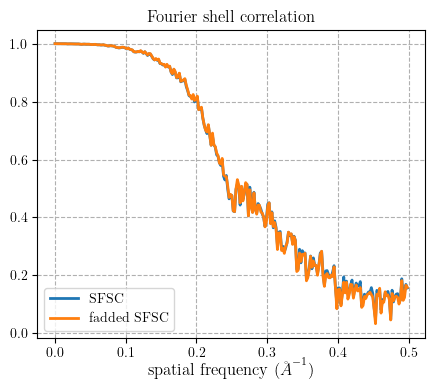

In [18]:
cmap_a = [plt.get_cmap('tab20c').colors[idx] for idx in [0, 4, 8, 12]]
cmap_b = [plt.get_cmap('tab20c').colors[idx] for idx in [2, 6, 10, 12]]
plt.figure(figsize=(5,4))
plt.plot(freq, sfsc, linewidth=2, label='SFSC')
#plt.plot(freq, sfsc_adjusted, linewidth=2, label='SFSC (adjusted)')
#plt.plot(freq, c_avg, linewidth=1, label='?')
plt.plot(freq, fadded_sfsc, linewidth=2, label='fadded SFSC')
#plt.plot(freq, fadded_sfsc_adjusted, linewidth=2, label='fadded SFSC (adjusted)')
#plt.plot(freq, fadded_c_avg, linewidth=1, label='fadded ?')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

In [10]:
EOS_freq, EOS_c_avg = fsc.get_SFRC_curve__even_odd(X)
print(len(EOS_freq), len(EOS_c_avg))

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
256 256


In [11]:
CBS_freq, CBS_c_avg = fsc.get_SFRC_curve__chessboard(X)
print(len(CBS_freq), len(CBS_c_avg))

compute_fourier_shell_correlation.shape=(512, 512)
256 256


In [12]:
ICBS_freq, ICBS_c_avg = fsc.get_SFRC_curve__interpolated_chessboard(X)
print(len(ICBS_freq), len(ICBS_c_avg))

compute_fourier_shell_correlation.shape=(512, 512)
256 256


In [13]:
#freq, SPRS1_c_avg = fsc.get_SFRC_curve__SPRS1(X)

In [14]:
SCBS_freq, SCBS_c_avg = fsc.get_SFRC_curve__subsampled_chessboard(X)
print(len(SCBS_freq), len(SCBS_c_avg))

compute_fourier_shell_correlation.shape=(256, 256)
compute_fourier_shell_correlation.shape=(256, 256)
128 128


In [15]:
SPRS_freq, SPRS_c_avg = fsc.get_SFRC_curve__SPRS(image=X, std_dev=1.75, sigma_poly=0.25, window_side=5, fadding_width=10)
print(len(SPRS_freq), len(SPRS_c_avg))

compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
compute_fourier_shell_correlation.shape=(512, 512)
256 256


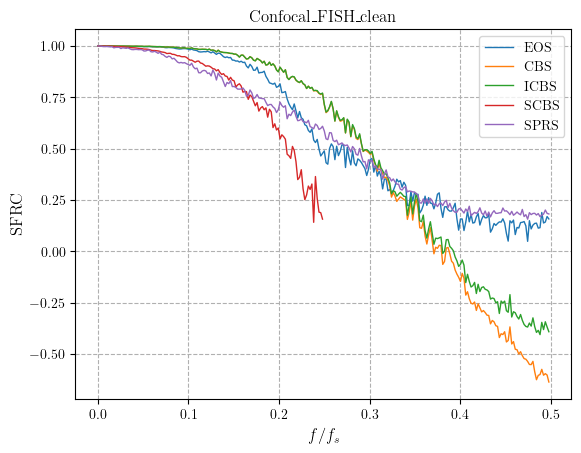

In [16]:
plt.plot(EOS_freq, EOS_c_avg, linewidth=1, label="EOS")
plt.plot(CBS_freq, CBS_c_avg, linewidth=1, label="CBS")
plt.plot(ICBS_freq, ICBS_c_avg, linewidth=1, label="ICBS")
plt.plot(SCBS_freq, SCBS_c_avg, linewidth=1, label="SCBS")
plt.plot(SPRS_freq, SPRS_c_avg, linewidth=1, label="SPRS")
plt.grid(which="major", linestyle="--")
plt.xlabel(r"$f/f_s$")
plt.ylabel(r"\text{SFRC}")
plt.title(r"$\mathrm{Confocal\_FISH\_clean}$")
plt.legend()
plt.savefig('Confocal_FISH_clean_SFRC.pdf', bbox_inches='tight')
plt.show()